In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [3]:
df=pd.read_csv(r'C:\Users\G Supriya\OneDrive\Desktop\student_updtaed_performance_streamlit_app\student_scores_dataset.csv')

In [75]:
df.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,pass_fail
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87,1
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90,1
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94,1
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86,1
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3160 entries, 0 to 3159
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          3160 non-null   int64 
 1   first_name                  3160 non-null   object
 2   last_name                   3160 non-null   object
 3   email                       3160 non-null   object
 4   gender                      3160 non-null   object
 5   part_time_job               3160 non-null   bool  
 6   absence_days                3160 non-null   int64 
 7   extracurricular_activities  3160 non-null   bool  
 8   weekly_self_study_hours     3160 non-null   int64 
 9   career_aspiration           3160 non-null   object
 10  math_score                  3160 non-null   int64 
 11  history_score               3160 non-null   int64 
 12  physics_score               3160 non-null   int64 
 13  chemistry_score             3160 non-null   int6

In [5]:
df.describe()

,id,absence_days,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,pass_fail
count,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000
mean,935.858861,3.577532,19.513291,61.841772,59.883228,60.387975,59.637975,59.520253,60.320253,60.151582,0.626582
std,610.688839,2.462315,10.632921,30.719075,29.167243,29.741454,29.066558,28.996221,29.596430,29.228588,0.483788
min,1.000000,0.000000,0.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.000000
25%,405.750000,2.000000,14.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,0.000000
50%,927.500000,3.000000,19.500000,75.000000,68.000000,69.000000,67.000000,67.000000,70.000000,69.000000,1.000000
75%,1448.000000,5.000000,29.000000,89.000000,86.000000,87.000000,85.000000,86.000000,87.000000,85.000000,1.000000
max,2000.000000,10.000000,50.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000,1.000000


In [6]:
df.columns

Index(['id', 'first_name', 'last_name', 'email', 'gender', 'part_time_job',
       'absence_days', 'extracurricular_activities', 'weekly_self_study_hours',
       'career_aspiration', 'math_score', 'history_score', 'physics_score',
       'chemistry_score', 'biology_score', 'english_score', 'geography_score',
       'pass_fail'],
      dtype='object')

In [7]:
df["pass_fail"].value_counts()

pass_fail
1    1980
0    1180
Name: count, dtype: int64

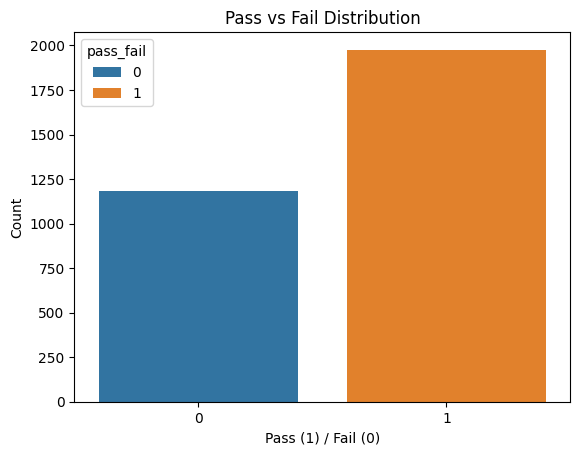

In [9]:
# Visualize the distribution of pass/fail
sns.countplot(x="pass_fail", data=df, hue="pass_fail")
plt.title("Pass vs Fail Distribution")
plt.xlabel("Pass (1) / Fail (0)")
plt.ylabel("Count")
plt.show()

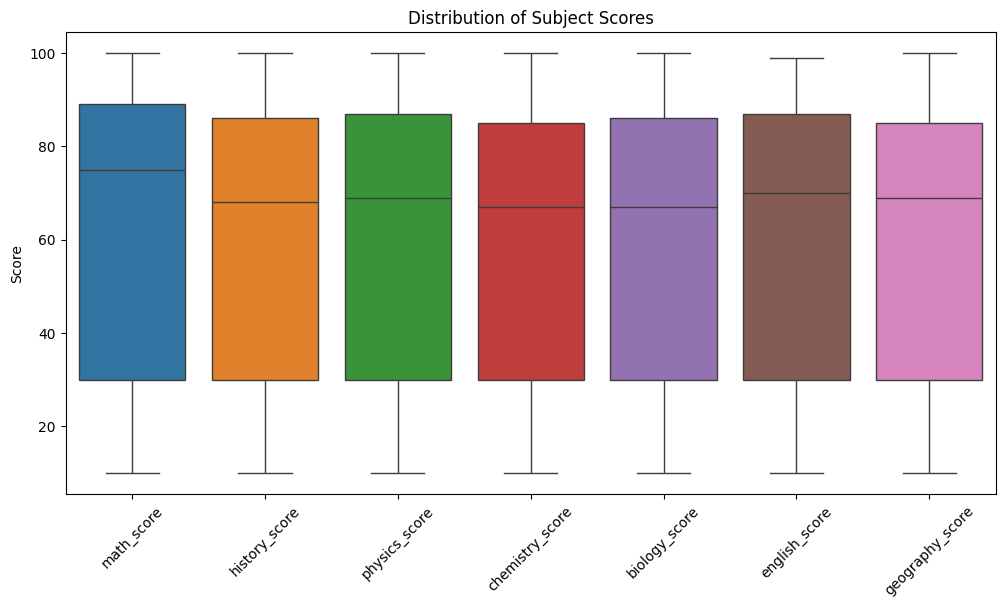

In [10]:
# Visualize the distribution of scores by pass/fail
score_cols = ['math_score', 'history_score', 'physics_score', 'chemistry_score',
              'biology_score', 'english_score', 'geography_score']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[score_cols])
plt.title("Distribution of Subject Scores")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()

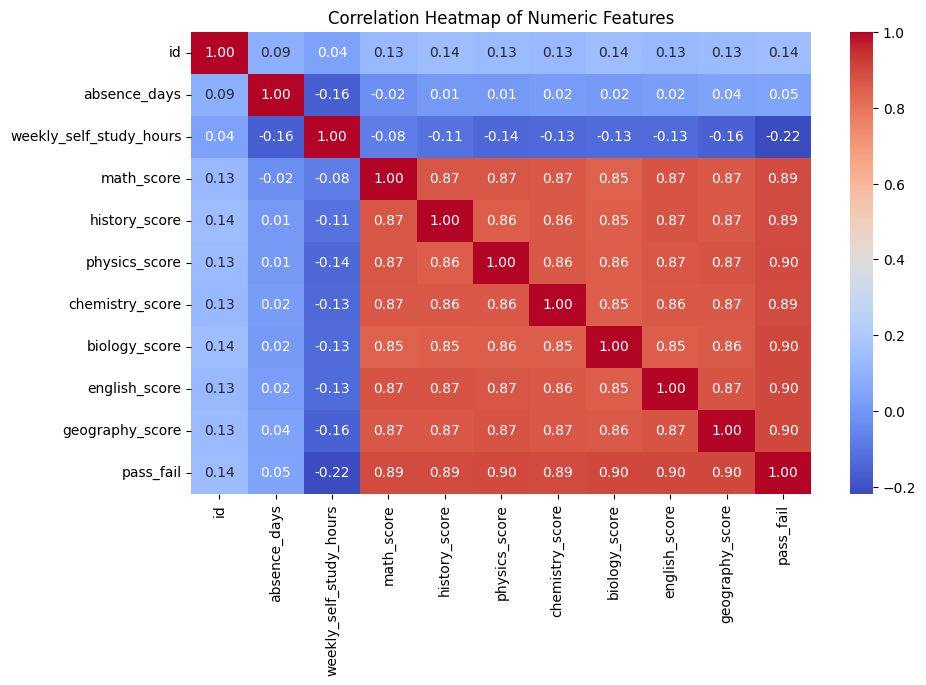

In [14]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(10,6))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

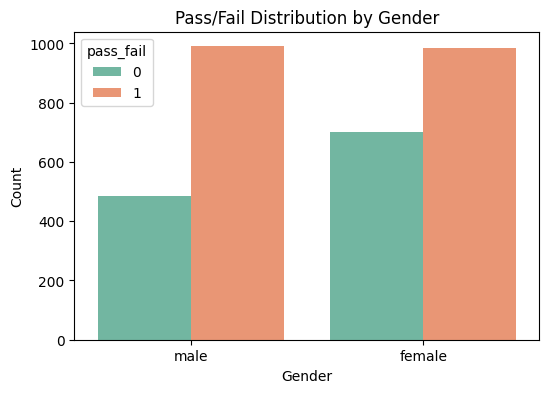

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x="gender", hue="pass_fail", data=df, palette="Set2")
plt.title("Pass/Fail Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


C:\Users\G Supriya\AppData\Local\Temp\ipykernel_8440\2692076081.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="pass_fail", y="weekly_self_study_hours", data=df, palette="Set3")


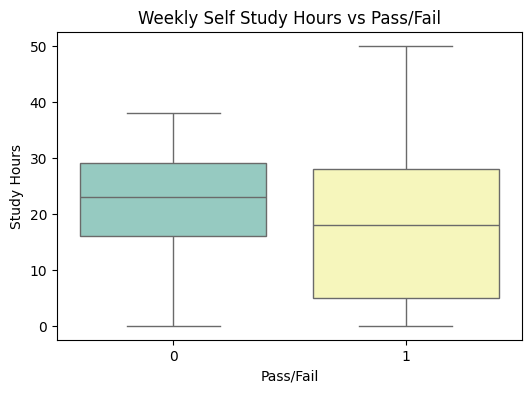

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(x="pass_fail", y="weekly_self_study_hours", data=df, palette="Set3")
plt.title("Weekly Self Study Hours vs Pass/Fail")
plt.xlabel("Pass/Fail")
plt.ylabel("Study Hours")
plt.show()

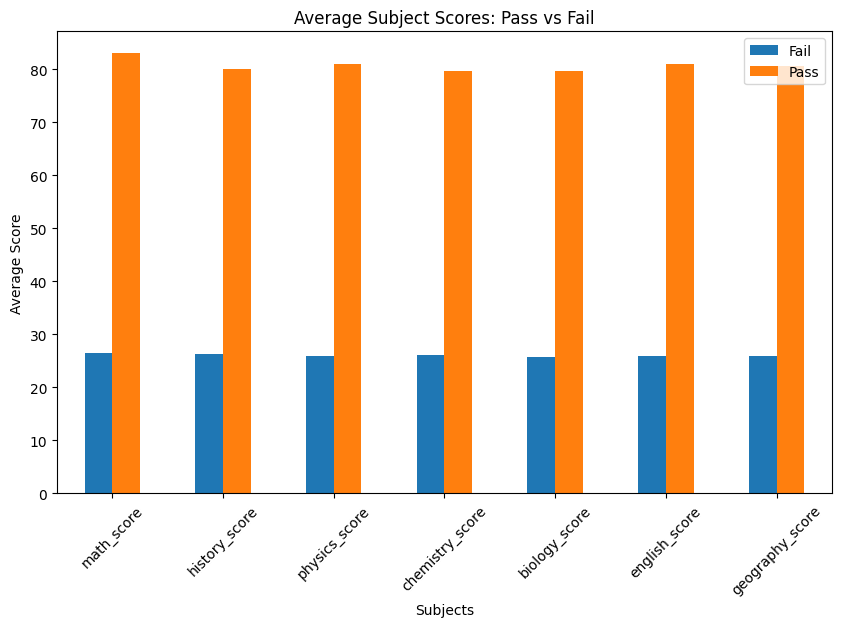

In [17]:
score_cols = ["math_score","history_score","physics_score",
              "chemistry_score","biology_score","english_score","geography_score"]

avg_scores = df.groupby("pass_fail")[score_cols].mean().T
avg_scores.plot(kind="bar", figsize=(10,6))
plt.title("Average Subject Scores: Pass vs Fail")
plt.ylabel("Average Score")
plt.xlabel("Subjects")
plt.xticks(rotation=45)
plt.legend(["Fail","Pass"])
plt.show()

In [18]:
y=df["pass_fail"]
X=df.drop(columns=["pass_fail"])    

In [19]:
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model=RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
y_pred=model.predict(X_test)

In [23]:
#comparing the actual and predicted values
compare_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(compare_df.head())

      Actual  Predicted
2464       1          0
2509       1          0
1052       0          1
1407       0          1
3159       1          0


In [24]:
#Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[204  16]
 [ 12 400]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       220
           1       0.96      0.97      0.97       412

    accuracy                           0.96       632
   macro avg       0.95      0.95      0.95       632
weighted avg       0.96      0.96      0.96       632



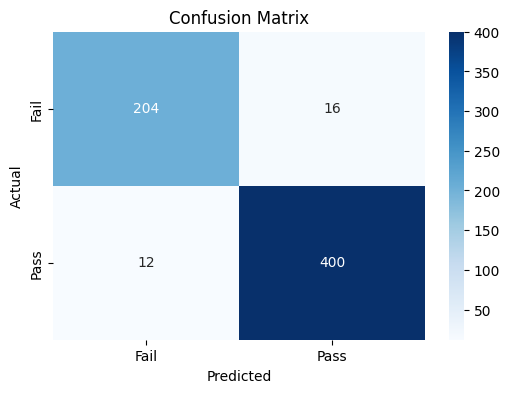

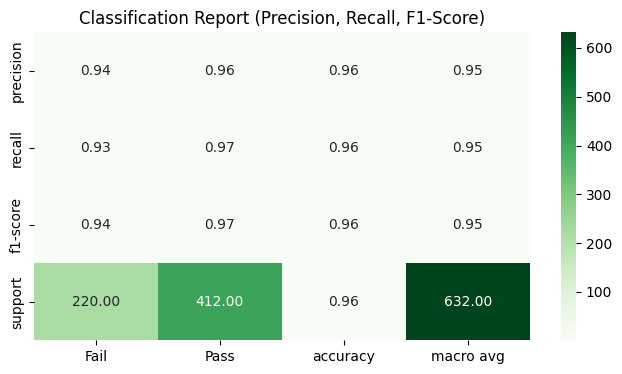

In [27]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail','Pass'], yticklabels=['Fail','Pass'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
report = classification_report(y_test, y_pred, target_names=['Fail', 'Pass'], output_dict=True)

df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(8,4))
sns.heatmap(df_report.iloc[:-1, :].T, annot=True, cmap="Greens", fmt=".2f")
plt.title("Classification Report (Precision, Recall, F1-Score)")
plt.show()
